<h1 align='center'> Football Transfer Market Data Analysis <h1>


# Scraping Player Data for Argentinos Juniors: Exploring Seasons and Market Values





**Importing libraries**


In [56]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter


import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)
warnings.filterwarnings("ignore")
%matplotlib inline

#variables
colour=['maroon','r','g','darkgreen','c','teal','b','navy','indigo','m','deeppink','orange','sienna','yellow','khaki','olive','tan','black','grey','brown']

print("Packages installed")

Packages installed


**Scraping and Organizing Football Player Data**

This code scrapes player data from the website "transfermarkt.com.ar" for multiple seasons of the "Argentinos Juniors" football team. It uses the Python libraries "requests" and "BeautifulSoup" to parse the HTML content of the webpages and extract relevant player information. The data is then cleaned and organized into a Pandas DataFrame, which is later saved as a CSV file named "jugadores.csv".

The code iterates through a list of URLs, each representing a different season's player data. It collects information such as player names, positions, dates of birth, heights, preferred foot, previous team, market value, and the corresponding season. The data is stored in separate lists for each attribute and then compiled into a DataFrame.

Finally, the DataFrame is saved to a CSV file for further analysis or use.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'
}

page_urls = [
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/saison_id/2007/plus/1",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2021"
]

players_list = []
position_list = []
birthdate_list = []
height_list = []
footed_list = []
signed_list = []
previous_team_list = []
market_value_list = []
season_list = []

for i, url in enumerate(page_urls):
    pageTree = requests.get(url, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    players_data = pageSoup.find_all("tr", {"class": ["odd", "even"]})

    for player in players_data:
        player_info = player.find_all("td")
        player_name = player_info[3].text.strip()
        position = player_info[4].text.strip()
        age = player_info[5].text.strip().split()[0] 
        height = player_info[8].text.strip()
        footed = player_info[9].text.strip()
        signed = player_info[10].text.strip()
        previous_team = player_info[11].find("img")["title"] if player_info[11].find("img") else ""
        market_value = player_info[13].text.strip()
        players_list.append(player_name)
        position_list.append(position)
        birthdate_list.append(age)
        height_list.append(height)
        footed_list.append(footed)
        signed_list.append(signed)
        previous_team_list.append(previous_team)
        market_value_list.append(market_value)
        season_list.append(i + 1)

df = pd.DataFrame({
    "Jugadores": players_list,
    "Posicion": position_list,
    "Fecha de nacimiento": birthdate_list,
    "Altura": height_list,
    "Pie": footed_list,
    "Fichado": signed_list,
    "Equipo Anterior": previous_team_list,
    "Valor de mercado": market_value_list,
    "Temporada": season_list
})

df.to_csv('jugadores.csv', index=False)



**Get Data**

I transformed the data into an Excel file for analysis and visualization.







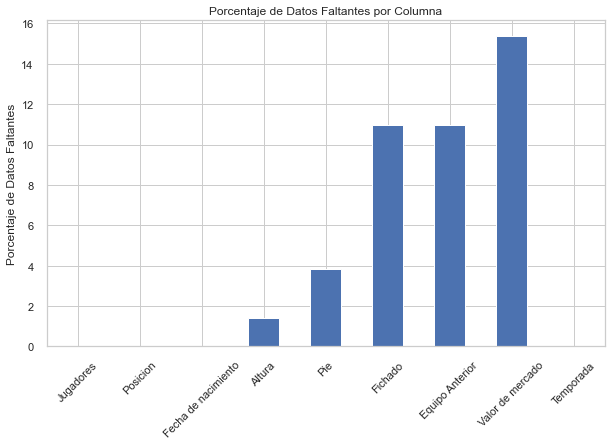

In [39]:
# Leer el archivo Excel
df = pd.read_excel("jugadores AAAJ.xlsx")

# Obtener el porcentaje de datos faltantes
missing_data_percentage = (df.isnull().sum() / len(df)) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
missing_data_percentage.plot(kind="bar")
plt.title("Porcentaje de Datos Faltantes por Columna")
plt.ylabel("Porcentaje de Datos Faltantes")
plt.xticks(rotation=45)
plt.show()



In brief, this code snippet imports the pandas and matplotlib.pyplot libraries, reads data from an Excel file into a DataFrame, calculates the percentage of missing data in each column, and visualizes it using a bar plot. The plot shows the percentage of missing data for each column on the y-axis and the column names on the x-axis, with rotated labels for better readability.


**Data cleaning** 

The function clean_market_value converts the "Valor de mercado" column in the DataFrame df from strings with currency symbols to numeric values representing players' market values in Euros.





In [40]:

def clean_market_value(value):
    if isinstance(value, str):
        if "mill." in value:
            return float(value.replace(" mill. €", "").replace(",", ".")) * 1000000
        elif "mil" in value:
            return float(value.replace(" mil €", "").replace(",", ".")) * 1000
    return 0

# Leer el archivo Excel
df = pd.read_excel("jugadores AAAJ.xlsx")

# Limpiar los valores de mercado
df["Valor de mercado"] = df["Valor de mercado"].apply(clean_market_value)



**Bar Chart of Total Market Value per Season for 'Argentinos Juniors' Team**


C:\Users\rodri\AppData\Local\Temp\ipykernel_12716\4029644287.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


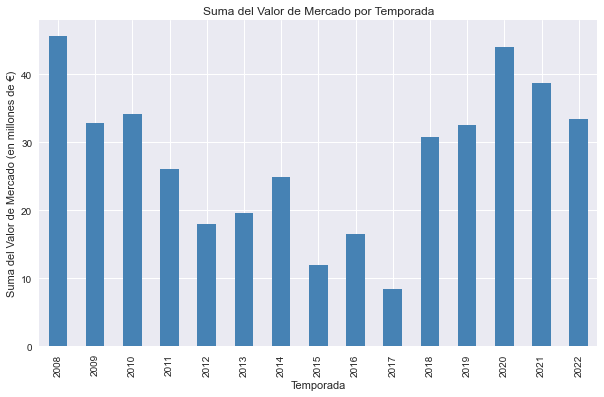

In [13]:


# Agrupar por temporada y calcular la suma de los valores de mercado
market_value_sum = df.groupby("Temporada")["Valor de mercado"].sum()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
market_value_sum.plot(kind="bar", ax=ax, color="steelblue")

# Configurar los ejes y título del gráfico
ax.set_xlabel("Temporada")
ax.set_ylabel("Suma del Valor de Mercado (en millones de €)")
ax.set_title("Suma del Valor de Mercado por Temporada")

# Ajustar el formato del eje Y para mostrar los valores en millones
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000000)}"))

# Mostrar el gráfico
plt.show()


This code creates a bar chart using Seaborn to visualize the total market value per season for the football team 'Argentinos Juniors'. It aggregates the data by season, calculates the sum of the market values, and presents the results in a bar chart with the Y-axis formatted in millions of euros.






**Visualizing Seasonal Total Market Value with Seaborn Heatmap**

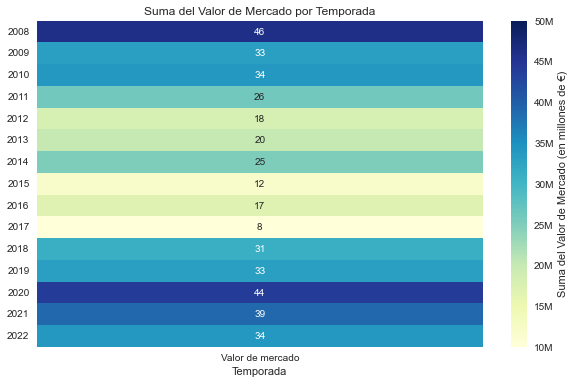

In [16]:

# Agrupar por temporada y calcular la suma de los valores de mercado
market_value_sum = df.groupby("Temporada")["Valor de mercado"].sum()

# Crear una tabla pivot para el mapa de calor
table = pd.pivot_table(df, values="Valor de mercado", index="Temporada", aggfunc="sum")

# Redondear los valores dentro de la tabla del mapa de calor
table = table.applymap(lambda x: round(x / 1000000))

# Crear un mapa de calor utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, cbar_kws={"label": "Suma del Valor de Mercado (en millones de €)",
                                                                              "format": FuncFormatter(lambda x, pos: f"{int(x):,}M")},
            vmin=10, vmax=50)  # Establecer los límites de la barra de color
plt.title("Suma del Valor de Mercado por Temporada")
plt.xlabel("Temporada")
plt.ylabel("")

# Mostrar el mapa de calor
plt.show()



This code calculates the total market value of a football team for each season and presents the results in a heatmap using Seaborn. The values are grouped by season, rounded, and displayed in the heatmap with a color bar indicating the range of values.

**Top 20 Previous Teams of Argentinos Juniors Players with Market Value > 100,000 Euros**




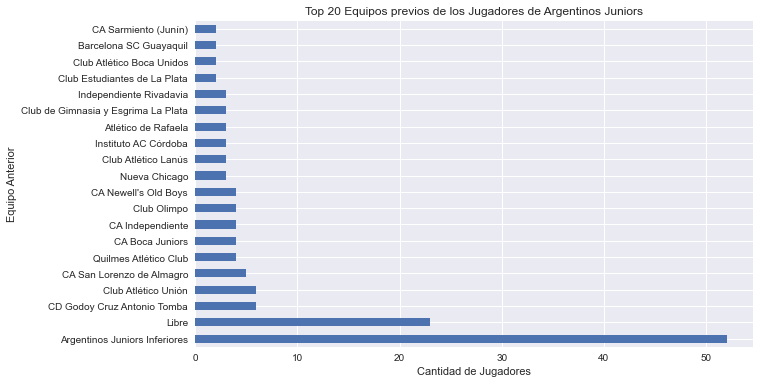

In [28]:
# Se filtran los jugados con un valor de mercado mayor a 100,000 euros
filtered_df = df[df["Valor de mercado"] > 100000]

# Filtro para solo contar una vez a cada jugador
filtered_df = filtered_df.drop_duplicates(subset="Jugadores", keep="first")

# Contar la frecuencia de cada equipo anterior
team_counts = filtered_df["Equipo Anterior"].value_counts().head(20)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
team_counts.plot(kind="barh")
plt.title("Top 20 Equipos previos de los Jugadores de Argentinos Juniors")
plt.xlabel("Cantidad de Jugadores")
plt.ylabel("Equipo Anterior")
plt.show()




In this code, we first filter the players with a market value greater than 100,000 euros. Then, we ensure that each player is counted only once by removing duplicates based on their names. Finally, we count the frequency of each previous team among the filtered players and create a horizontal bar chart to visualize the top 20 previous teams with the most players in Argentinos Juniors.


**Footed Distribution: Proportion of Left and Right-Footed Players**

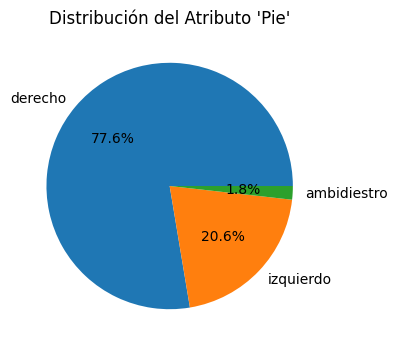

In [120]:

# Contar la frecuencia de cada valor en la columna "Pie"
footed_counts = df["Pie"].value_counts()

# Configurar el estilo del gráfico
plt.style.use("default")

# Crear el gráfico de torta con fondo blanco
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_facecolor("white")
ax.pie(footed_counts, labels=footed_counts.index, autopct='%1.1f%%')
ax.set_title("Distribución del Atributo 'Pie'")

plt.show()


**Age Distribution by Season: Box Plot**

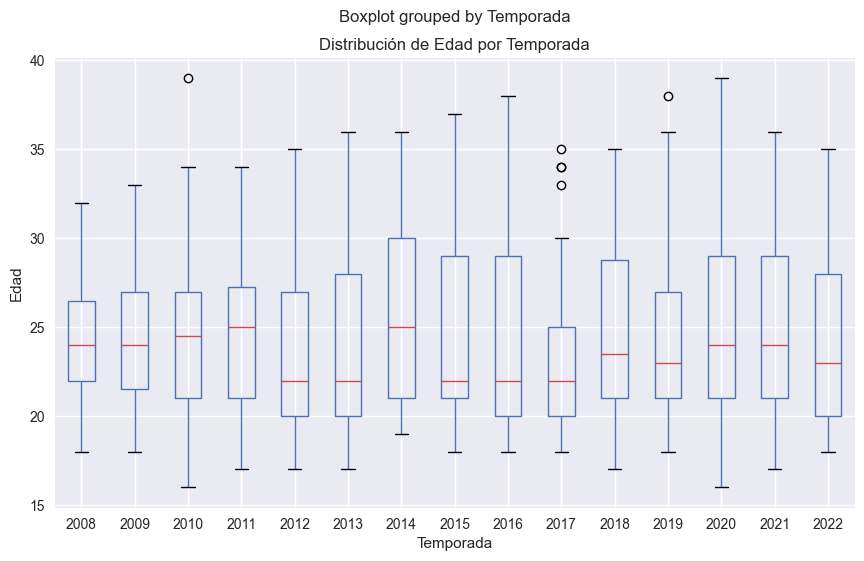

In [161]:

# Limpiar los paréntesis en la columna "Fecha de nacimiento"
df["Fecha de nacimiento"] = df["Fecha de nacimiento"].str.strip("()")

# Calcular la edad para cada jugador
df["Edad"] = df["Fecha de nacimiento"]

# Convertir la columna "Edad" a tipo numérico
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de cajas
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column="Edad", by="Temporada", ax=ax)
ax.set_xlabel("Temporada")
ax.set_ylabel("Edad")
ax.set_title("Distribución de Edad por Temporada")

plt.show()


Explanation: This code snippet first cleans the "Fecha de nacimiento" (Date of Birth) column by removing any parentheses. Then, it calculates the age for each player based on the cleaned date of birth. The "Edad" (Age) column is converted to numeric values, and a box plot is created to visualize the distribution of ages for each season. The box plot allows us to observe the spread, median, quartiles, and potential outliers in the age distribution across different seasons for the players of "Argentinos Juniors" football team.




